In [3]:
import numpy as np 
import polars as pl 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
tr_data =pl.read_csv('train.csv')

In [9]:
tr_data.head(10)

id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.45
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.53
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
5,5,4,1,4,2,4,6,6,7,5,5,3,5,5,4,4,6,8,3,2,0.44
6,8,3,1,2,3,7,3,4,6,7,5,2,5,6,4,5,6,3,4,6,0.46
7,6,6,5,7,5,5,3,5,5,5,3,5,3,5,5,8,6,8,5,6,0.595
8,5,2,8,5,4,5,2,4,5,5,2,9,2,7,3,4,6,4,5,5,0.505


In [10]:
test_data =pl.read_csv('test.csv')

In [11]:
test_data.head(10)

id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
1117962,3,4,8,4,6,5,2,5,9,6,6,4,3,7,1,6,6,3,5,6
1117963,5,5,6,8,6,5,3,6,9,4,6,4,2,5,5,5,4,6,5,5
1117964,6,9,6,5,5,5,3,8,10,7,3,5,6,1,2,5,3,6,4,4
1117965,6,5,2,4,6,4,5,8,4,5,4,2,6,6,7,3,3,6,5,2


In [12]:
tr_data.describe()

statistic,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6,1.117957e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",558978.0,4.92145,4.926671,4.955322,4.94224,4.942517,4.934093,4.955878,4.927791,4.942619,4.94923,4.945239,4.946893,4.953999,4.931376,4.929032,4.925907,4.92752,4.950859,4.940587,4.939004,0.50448
"""std""",322726.531784,2.056387,2.093879,2.072186,2.051689,2.083391,2.057742,2.083063,2.065992,2.068545,2.083324,2.078141,2.072333,2.088899,2.078287,2.082395,2.064813,2.074176,2.068696,2.081123,2.09035,0.051026
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285
"""25%""",279489.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.47
"""50%""",558978.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.505
"""75%""",838467.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0.54
"""max""",1.117956e6,16.0,18.0,16.0,17.0,17.0,17.0,16.0,16.0,16.0,18.0,16.0,17.0,17.0,16.0,16.0,17.0,18.0,19.0,16.0,16.0,0.725


In [15]:
tr_data.is_empty()

False

In [19]:
tr_data.shape

(1117957, 22)

In [20]:
tr_data.corr()

id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.000093,-0.001518,-0.000413,-0.00008,0.00058,-0.000188,0.000133,0.000281,-0.000103,-0.000147,-0.000208,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
-0.000093,1.0,-0.007362,-0.00807,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,-0.008032,-0.009716,-0.010659,-0.009121,-0.0089,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
-0.001518,-0.007362,1.0,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,-0.010746,-0.010056,-0.012526,-0.01024,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.01235,0.187635
-0.000413,-0.00807,-0.009924,1.0,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,-0.010675,-0.011277,-0.01168,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.01155,0.187131
-0.00008,-0.007251,-0.008548,-0.008574,1.0,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,-0.009512,-0.01049,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.000625,-0.008679,-0.010815,-0.006727,-0.011777,-0.011485,-0.010332,-0.009599,-0.008739,-0.008958,-0.010645,-0.011893,-0.011975,-0.013256,-0.008959,-0.010315,-0.007608,1.0,-0.011128,-0.009847,-0.012772,0.18589
0.000931,-0.006811,-0.010267,-0.010069,-0.011004,-0.011023,-0.009376,-0.009372,-0.008667,-0.011392,-0.010364,-0.010299,-0.011199,-0.011989,-0.011226,-0.012403,-0.008607,-0.011128,1.0,-0.00983,-0.011061,0.183396
-0.001535,-0.008155,-0.011617,-0.009673,-0.010424,-0.011584,-0.010772,-0.011374,-0.009079,-0.010418,-0.012175,-0.01208,-0.01306,-0.014006,-0.011052,-0.013059,-0.008214,-0.009847,-0.00983,1.0,-0.01154,0.180968


In [21]:
tr_data.columns

['id',
 'MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'FloodProbability']

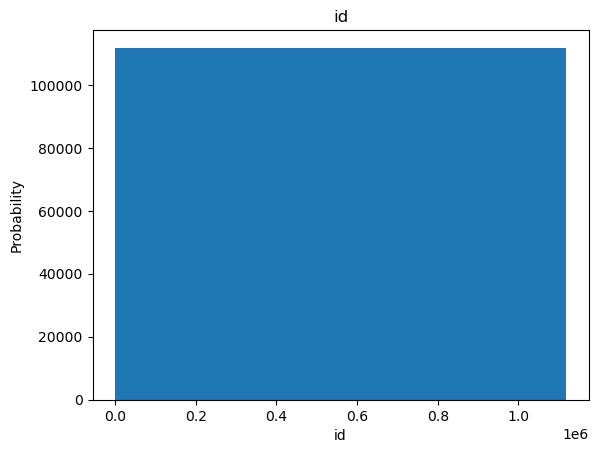

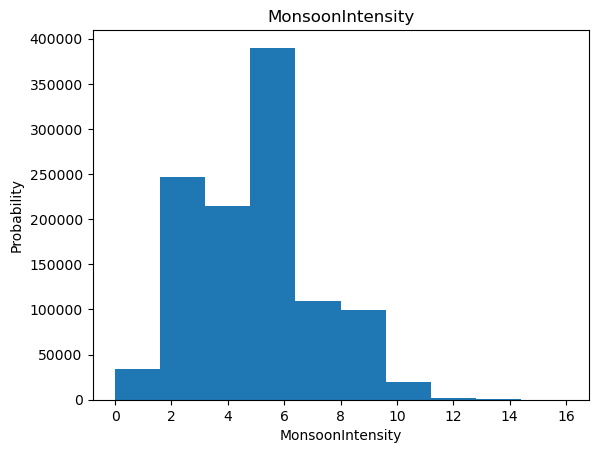

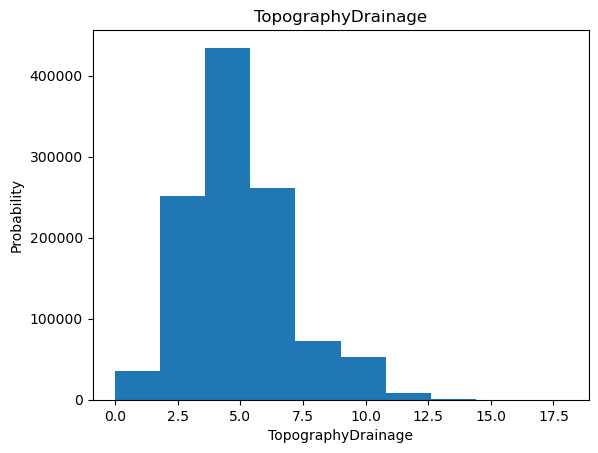

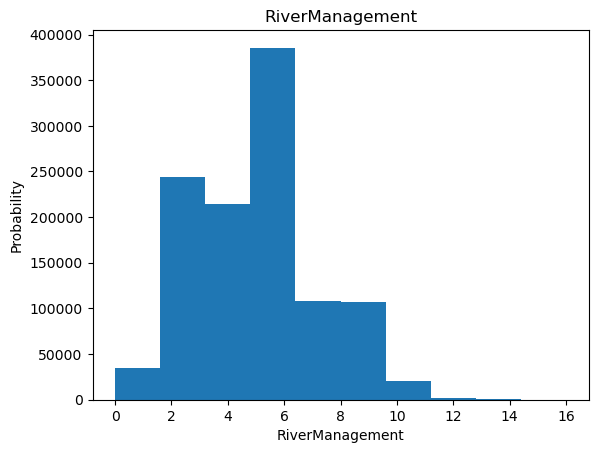

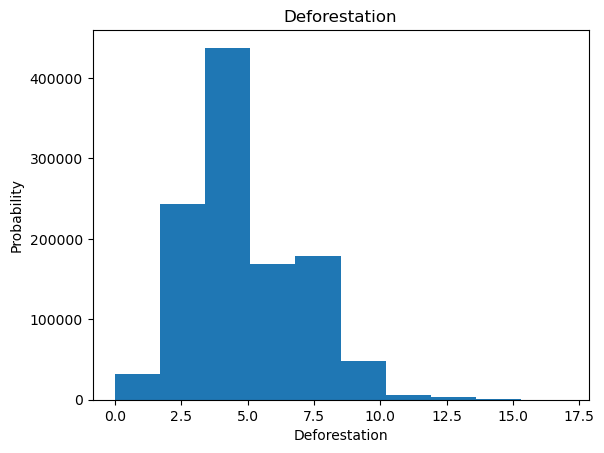

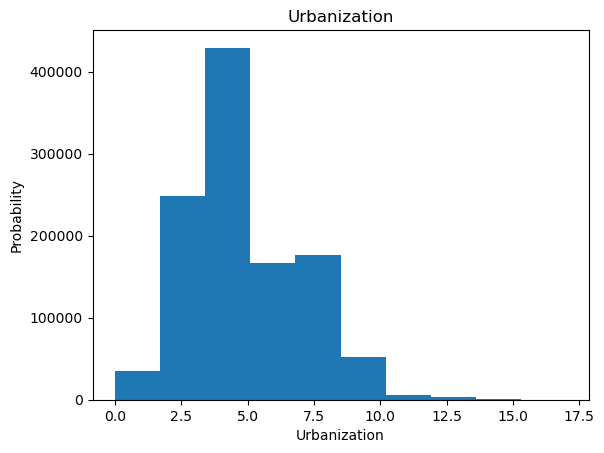

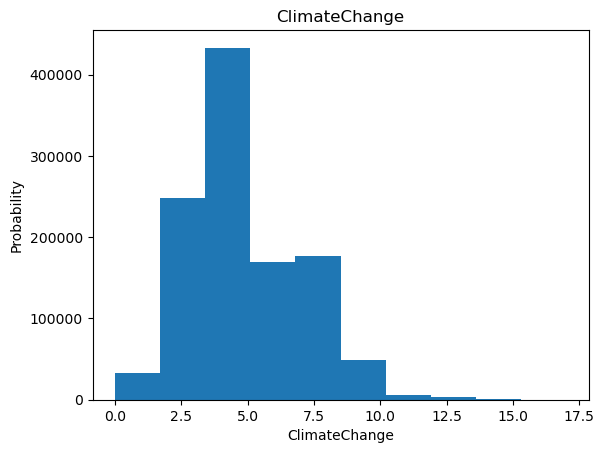

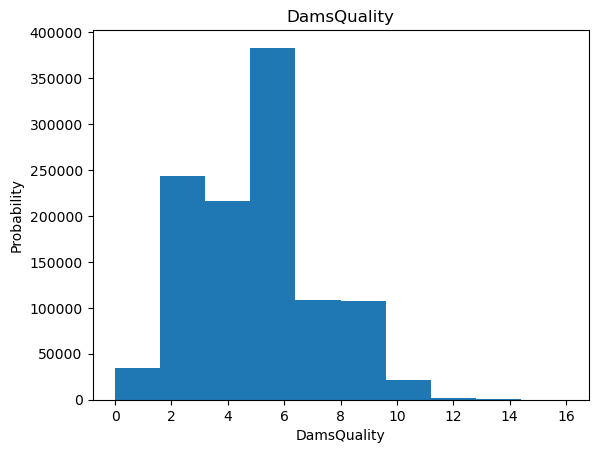

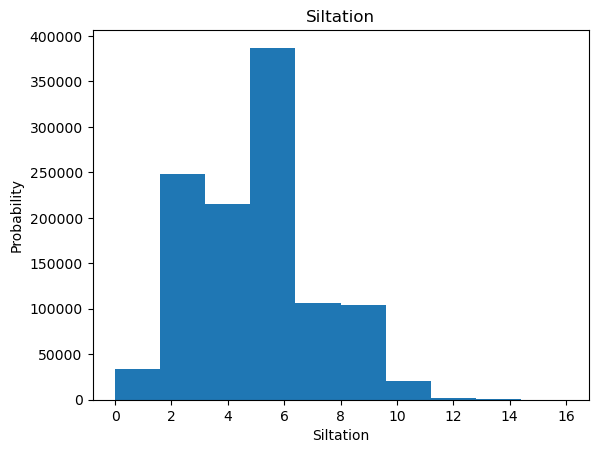

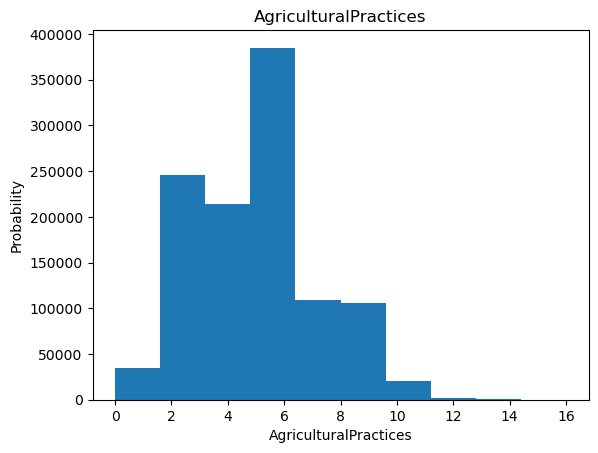

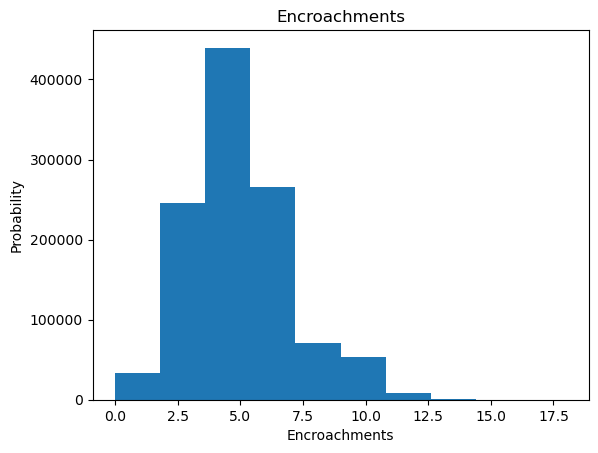

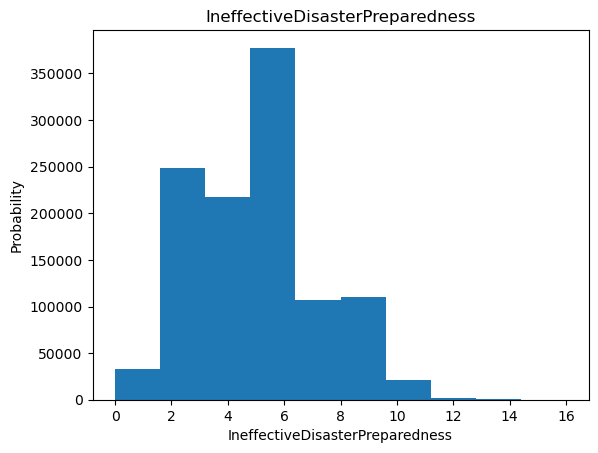

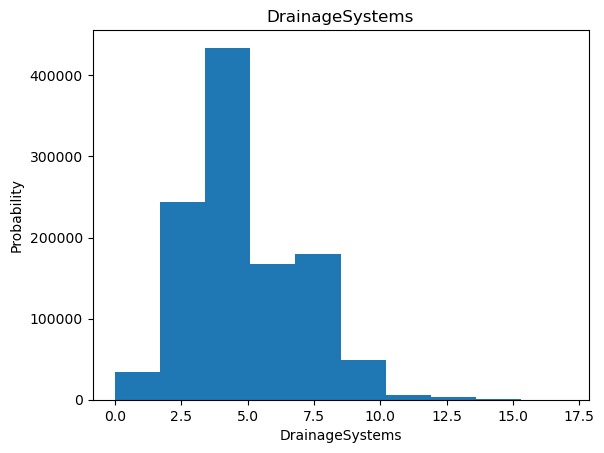

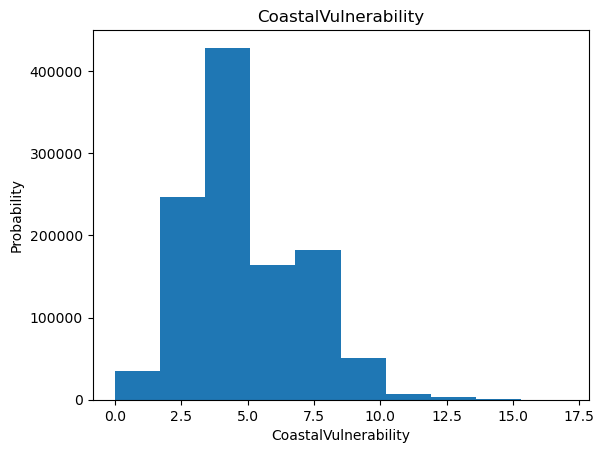

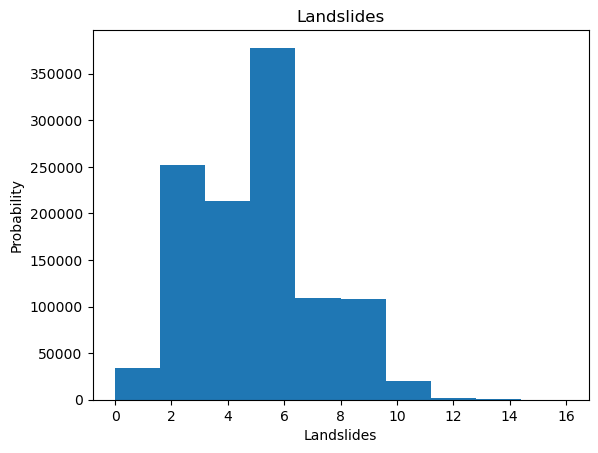

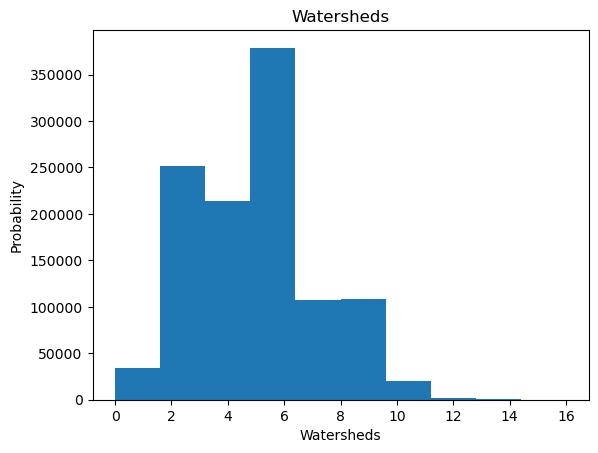

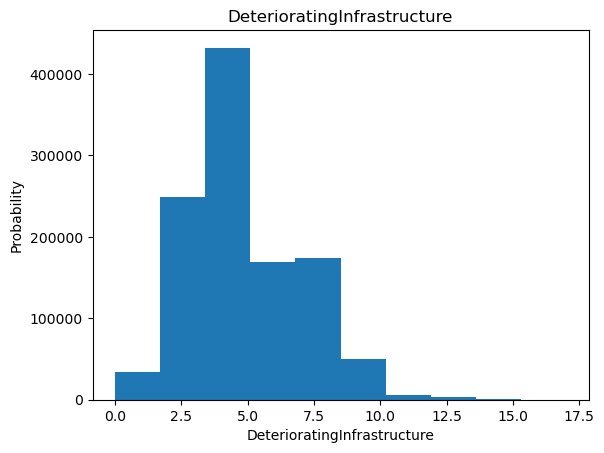

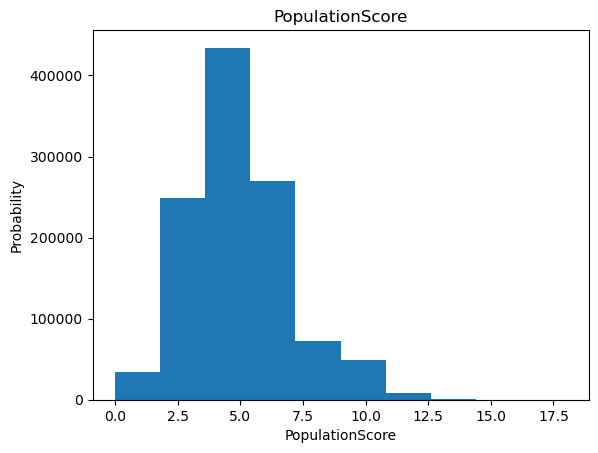

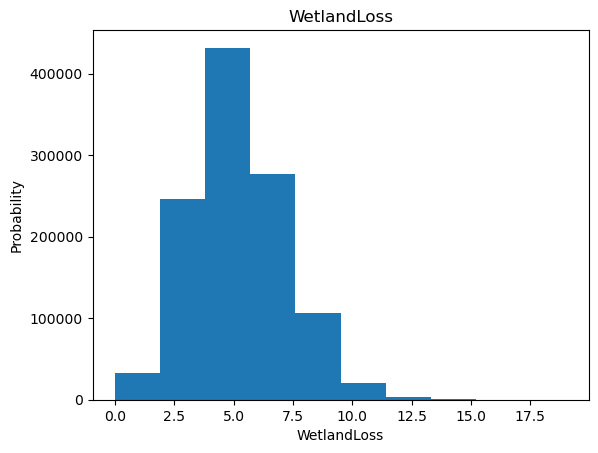

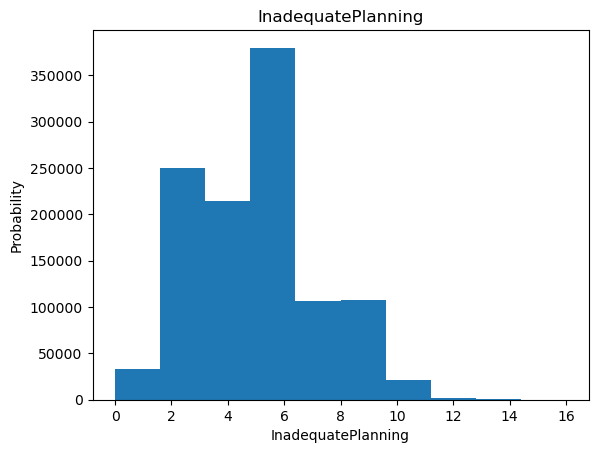

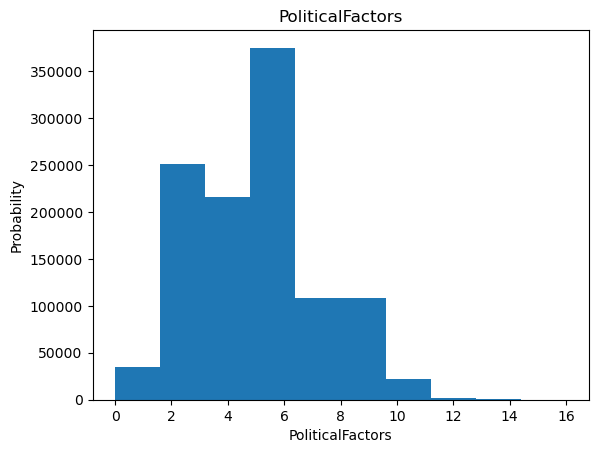

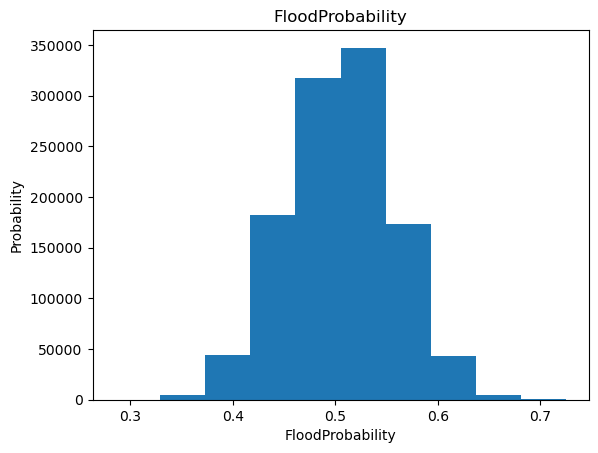

In [23]:
for col in tr_data.columns:
    plt.hist(tr_data[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Probability")
    plt.show()

<Figure size 1400x1000 with 0 Axes>

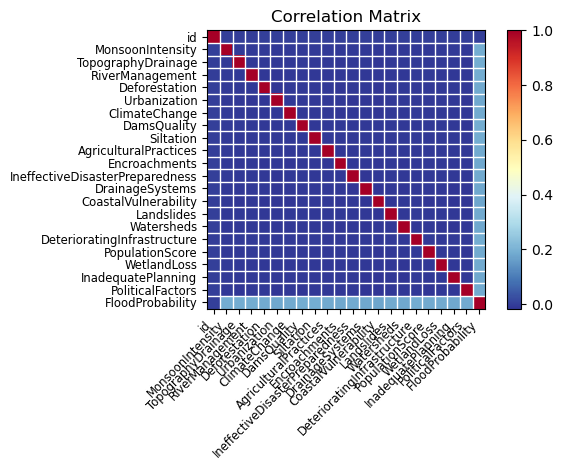

In [29]:
plt.figure(figsize=(14,10))
import statsmodels.api as sm 
co =tr_data.corr()
sm.graphics.plot_corr(co,xnames=list(co.columns))
plt.show()

VIF(Variance Inflation factor)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = np.array(add_constant(tr_data), dtype=float)

vif = pl.Series([variance_inflation_factor(X, i) for i in range(X.shape[1])])
vif

""
f64
152.517829
1.000011
1.331574
1.34886
1.343868
…
1.346067
1.339142
1.34036


# Model Creation : LinearRegression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
import pandas as pd
ts_data=pd.read_csv('test.csv')
t_data = pd.read_csv('train.csv')

In [50]:
y = t_data['FloodProbability']
x = t_data.drop(['FloodProbability'], axis=1)
X_test = ts_data

In [51]:
x

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,3,7,8,7,2,2,1,4,6,4
1117953,1117953,2,2,4,3,9,5,8,1,3,...,5,9,4,4,3,7,4,9,4,5
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,5,6,5,5,2,4
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,6,8,5,3,4,6,7,6,4


In [52]:
y

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [53]:
X_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [54]:
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state=10, train_size=0.8)

In [55]:
model =LinearRegression()
model =model.fit(X_train,y_train)

In [56]:
y_pred = model.predict(X_test)
y_pred

array([0.49982022, 0.460527  , 0.53935673, ..., 0.60169257, 0.49432232,
       0.57350446])

In [57]:
model.score(X_test,y_test)

0.8459158953156948

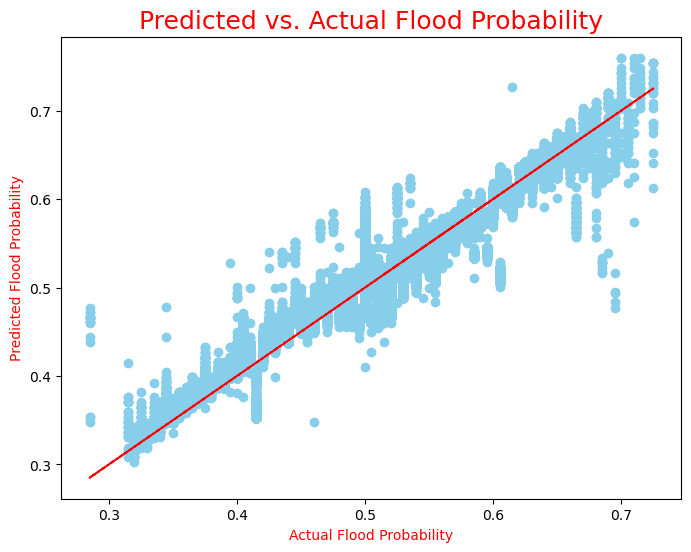

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Flood Probability', color="red", fontsize=18)
plt.xlabel('Actual Flood Probability', color="red")
plt.ylabel('Predicted Flood Probability', color='red')
plt.show()

In [75]:
submission = pd.DataFrame()

submission['id'] = X_test['id']
submission['FloodProbability'] = y_pred

In [76]:
submission

,id,FloodProbability
740419,740419,0.499820
1059792,1059792,0.460527
478337,478337,0.539357
471962,471962,0.466156
963634,963634,0.505484
...,...,...
1060255,1060255,0.528009
920408,920408,0.386798
758183,758183,0.601693
936396,936396,0.494322
